In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# ÌïúÍ∏Ä Í∏ÄÍº¥Ï≤¥ Î≥ÄÍ≤Ω
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() Ïù¥Îü∞Í±∞ ÌñàÏùÑ Îïå, Ïª¨ÎüºÏù¥ ÏÉùÎûµÎêòÏßÄ ÏïäÍ≥†, Î™®Îì† Ïª¨Îüº Îú®Í≤å
pd.set_option('display.max_columns', None)
# ÏßÄÏàò ÌëúÍ∏∞Î≤ï ÎåÄÏã†Ïóê ÏÜåÏàòÏ†êÏúºÎ°ú ÌëúÏãúÌïòÎäîÏΩîÎìú
pd.options.display.float_format = '{:.5f}'.format
# Í∞í Í∏∏Ïù¥ Ï†úÌïú X
pd.set_option('display.max_colwidth', None) # Í∞í Í∏∏Ïù¥ Ï†úÌïú ÏóÜÏùå

In [ ]:
df = pd.read_csv("data/full_data/TPS_cancel_data_Final.csv")

In [4]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
21483374  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483375  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483376  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483377  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483378  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         MEDIA_NM_GRP PROD_NM_GRP AGMT_KIND_NM STB_RES_1M_YN SCRB_PATH_NM_GRP  \
0                  HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N              I/B   
1                  HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             Y              I/B   
2                  HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N              I/B   
3                  HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N              I/B   
4                  HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N              I/B   
...               ...         ...          ...           ...              ...   
21483374           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N             ÌòÑÏû•Í≤ΩÎ°ú   
21483375           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N             ÌòÑÏû•Í≤ΩÎ°ú   
21483376           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N             ÌòÑÏû•Í≤ΩÎ°ú   
21483377           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N             ÌòÑÏû•Í≤ΩÎ°ú   
21483378           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             Y             ÌòÑÏû•Í≤ΩÎ°ú   

          INHOME_RATE  AGMT_END_SEG  TOTAL_USED_DAYS BUNDLE_YN  TV_I_CNT  \
0            10.00000  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ              733         Y   3.00000   
1             0.00000  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî              764         Y   3.00000   
2            10.00000  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî              794         Y   3.00000   
3            10.00000  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî              825         Y   3.00000   
4             0.00000   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî              855         Y   3.00000   
...               ...           ...              ...       ...       ...   
21483374     10.00000  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ             2338         N   1.00000   
21483375     10.00000  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ             2368         N   1.00000   
21483376     10.00000  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ             2399         N   1.00000   
21483377      0.00000  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ             2429         N   1.00000   
21483378      0.00000  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ             2460         N   1.00000   

         CH_LAST_DAYS_BF_GRP VOC_TOTAL_MONTH1_YN VOC_STOP_CANCEL_MONTH1_YN  \
0                     3Í∞úÏõîÎÇ¥ÏóÜÏùå                   N                         N   
1                       ÏùºÏ£ºÏùºÎÇ¥                   Y                         N   
2                       3Ï£ºÏùºÏ†Ñ                   N                         N   
3                       4Ï£ºÏùºÏ†Ñ                   N                         N   
4                       ÏùºÏ£ºÏùºÎÇ¥                   N                         N   
...                      ...                 ...                       ...   
21483374                ÏùºÏ£ºÏùºÎÇ¥                   N                         N   
21483375                ÏùºÏ£ºÏùºÎÇ¥                   N                         N   
21483376                2Ï£ºÏùºÏ†Ñ                   Y                         N   
21483377              3Í∞úÏõîÎÇ¥ÏóÜÏùå                   N                         N   


LightGBM ÌïôÏäµ

In [19]:
# 2Ïõî ~ 9Ïõî train
# 10Ïõî val
# 11Ïõî test
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
val = df[df['p_mt'] == 10]
test = df[df['p_mt'] == 11]

# INHOME_RATE Ïª¨ÎüºÏùÄ objectÎ°ú

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
val['INHOME_RATE'] = val['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(val['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

train = train.drop(columns=['sha2_hash','p_mt'])
val = val.drop(columns=['sha2_hash','p_mt'])
test = test.drop(columns=['sha2_hash','p_mt'])

object
object
object


In [20]:
from sklearn.utils import resample

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
df_Y = train[train['churn'] == 'Y']
df_N = train[train['churn'] == 'N']

# YÏùò Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÏôÄ ÎπÑÏú®Ïóê Îî∞Î•∏ NÏùò ÏÉòÌîå Í∞úÏàò Í≥ÑÏÇ∞
y_count = len(df_Y)  # Y Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
n_count_target = int((6 / 4) * y_count)  # 6:4 ÎπÑÏú®Î°ú N Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Í≥ÑÏÇ∞

# N Îç∞Ïù¥ÌÑ∞Î•º ÎûúÎç§ ÏÉòÌîåÎßÅ
df_N_downsampled = resample(
    df_N,
    replace=False,  # Î≥µÏõê ÏÉòÌîåÎßÅ ÌïòÏßÄ ÏïäÏùå
    n_samples=n_count_target,  # Î™©Ìëú ÏÉòÌîå Í∞úÏàò
    random_state=42  # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú ÏãúÎìú
)

# Ïñ∏ÎçîÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
train_balanced = pd.concat([df_Y, df_N_downsampled])

# Í≤∞Í≥º ÏÑûÍ∏∞ (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Í≤∞Í≥º ÌôïÏù∏
print("ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:")
print(train_balanced['churn'].value_counts())

train = train_balanced

ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:
churn
N    158559
Y    105706
Name: count, dtype: int64


In [21]:
categorical_cols = train.select_dtypes(include=['object']).columns

# TrainÏóêÎäî ÏóÜÍ≥† ValidationÏóêÎßå ÏûàÎäî Í∞í Ï∞æÍ∏∞
unseen_values = {}

for col in categorical_cols:
    train_unique = set(train[col].unique())
    val_unique = set(val[col].unique())

    unseen = val_unique - train_unique
    if unseen:
        unseen_values[col] = unseen

# Í≤∞Í≥º Ï∂úÎ†•
print(unseen_values)

{'PROD_NM_GRP': {'Í∏∞ÌÉÄ'}, 'INHOME_RATE': {'100.0'}}


In [22]:
val = val[val['PROD_NM_GRP'] != 'Í∏∞ÌÉÄ'].reset_index(drop=True)
test = test[test['PROD_NM_GRP'] != 'Í∏∞ÌÉÄ'].reset_index(drop=True)

val = val[val['INHOME_RATE'] != '100.0'].reset_index(drop=True)
test = test[test['INHOME_RATE'] != '100.0'].reset_index(drop=True)

In [9]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏßÑÌñâ!

from sklearn.preprocessing import LabelEncoder

categorical_cols = train.select_dtypes(include=['object']).columns

# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏàòÌñâ
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    val[col] = le.transform(val[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù


In [10]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎßµÌïë

for col in categorical_cols:
    unique_mapping = {orig: enc for orig, enc in zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_))}
    
    mapping_str = ", ".join([f"{key}: {value}" for key, value in unique_mapping.items()])
    
    print(f"Ïª¨Îüº: {col}")
    print(mapping_str)
    print("-" * 50)  # Íµ¨Î∂ÑÏÑ†


Ïª¨Îüº: MEDIA_NM_GRP
HD: 0, UHD: 1, Í∏∞ÌÉÄ: 2
--------------------------------------------------
Ïª¨Îüº: PROD_NM_GRP
Î≤†Ïù¥ÏßÅ: 0, ÏÑ∏Ïù¥Î≤Ñ: 1, Ïä§ÌÉ†Îã§Îìú: 2, Ïù¥ÏΩîÎÖ∏ÎØ∏: 3, ÌîÑÎ¶¨ÎØ∏ÏóÑ: 4
--------------------------------------------------
Ïª¨Îüº: AGMT_KIND_NM
Ïã†Í∑ú: 0, ÏïΩÏ†ïÍ∞±Ïã†: 1, ÏïΩÏ†ïÏäπÍ≥Ñ: 2, ÏïΩÏ†ïÏó∞Ïû•: 3, ÏïΩÏ†ïÏ∂ïÏÜå: 4, Ïû¨ÏïΩÏ†ï: 5, Ï†ïÎ≥¥ÏóÜÏùå: 6
--------------------------------------------------
Ïª¨Îüº: STB_RES_1M_YN
N: 0, Y: 1
--------------------------------------------------
Ïª¨Îüº: SCRB_PATH_NM_GRP
I/B: 0, O/B: 1, Í∏∞ÌÉÄ: 2, Î†åÌÉàÏ†úÌú¥: 3, ÏùºÎ∞òÏÉÅÎã¥: 4, ÏûÑÏßÅÏõê: 5, Ï†ÑÎûµÏ±ÑÎÑê: 6, Ï†ïÎ≥¥ÏóÜÏùå: 7, ÏßÅÏòÅÎ™∞: 8, ÌòÑÏû•Í≤ΩÎ°ú: 9
--------------------------------------------------
Ïª¨Îüº: INHOME_RATE
0.0: 0, 10.0: 1, 20.0: 2, 30.0: 3, 40.0: 4, 50.0: 5, 60.0: 6, 70.0: 7, 80.0: 8, 90.0: 9
--------------------------------------------------
Ïª¨Îüº: AGMT_END_SEG
ÏïΩÏ†ïÎßåÎ£å 1Í∞úÏõî: 0, ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ: 1, ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 1~2Í∞úÏõî: 2, ÏïΩÏ

In [11]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ÎÇ¥Í∞Ä Ï†ïÌïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1','MONTHS_REMAINING']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
val[robust_columns] = robust_scaler.transform(val[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
val[minmax_columns] = minmax_scaler.transform(val[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


In [12]:
from lightgbm import LGBMClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    class_weight='balanced',
    random_state=42 
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', random_state=42)

Validation Accuracy: 0.82

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1934319
           1       0.03      0.73      0.05     14325

    accuracy                           0.82   1948644
   macro avg       0.51      0.77      0.48   1948644
weighted avg       0.99      0.82      0.89   1948644


Confusion Matrix (Validation):
[[1579140  355179]
 [   3918   10407]]


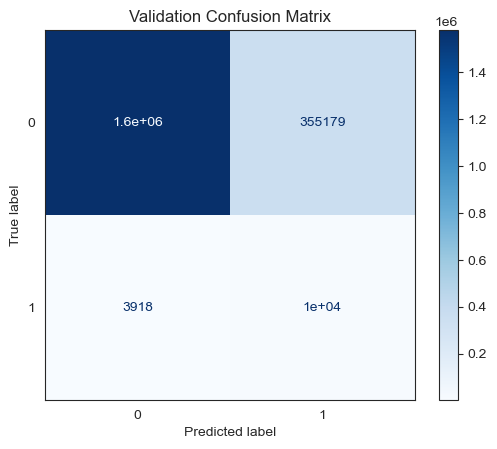

Validation AUC-ROC: 0.85


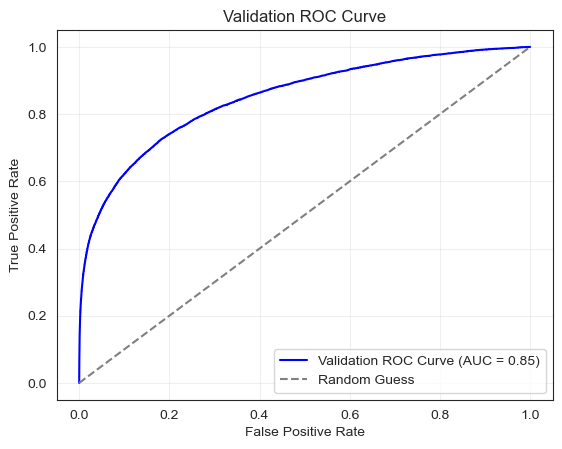

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (Validation) ÌèâÍ∞Ä
# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(val) ÏòàÏ∏°
val_predictions = lgbm_model.predict(X_val)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
conf_matrix = confusion_matrix(y_val, val_predictions)
print(conf_matrix)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lgbm_model.classes_)
disp_val.plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# AUC-ROC Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
# -----------------------------------------------------------
val_probabilities = lgbm_model.predict_proba(X_val)[:, 1]  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve Í≥ÑÏÇ∞
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# ROC Curve ÏãúÍ∞ÅÌôî
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Test Performance:
Test Accuracy: 0.82
Test AUC-ROC: 0.85
              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1932409
           1       0.03      0.73      0.05     13176

    accuracy                           0.82   1945585
   macro avg       0.51      0.78      0.48   1945585
weighted avg       0.99      0.82      0.89   1945585



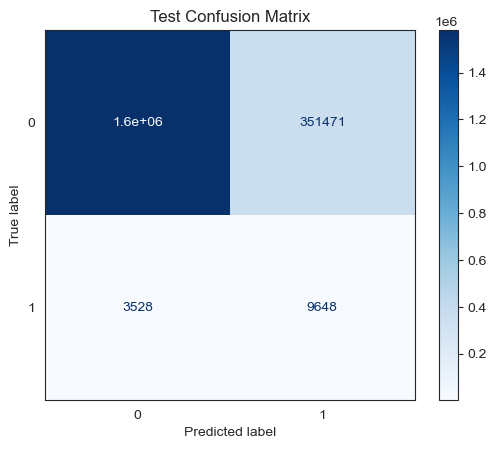

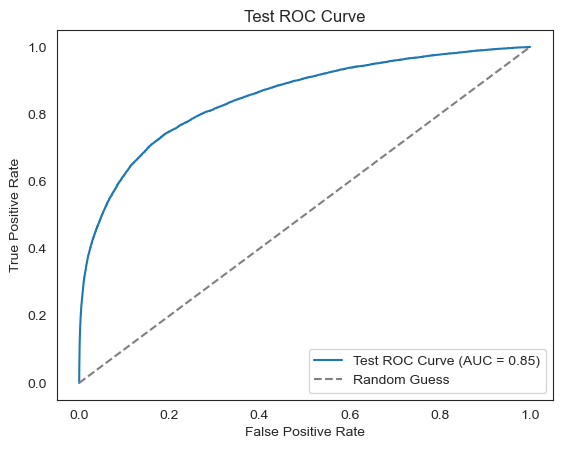

In [14]:
# -----------------------------------------------------------
# 4. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

test_predictions = lgbm_model.predict(X_test)
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, test_predictions)
test_auc = roc_auc_score(y_test, test_probabilities)

print("\nTest Performance:")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test AUC-ROC: {test_auc:.2f}")
print(classification_report(y_test, test_predictions))

# Confusion Matrix ÏãúÍ∞ÅÌôî
cm_test = confusion_matrix(y_test, test_predictions)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lgbm_model.classes_)
disp_test.plot(cmap="Blues")
plt.title("Test Confusion Matrix")
plt.show()

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC Curve")
plt.legend()
plt.show()

ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÏßÑÌñâÌï¥Î≥¥Ïûê. with Optuna

#### üìå OptunaÎûÄ?

##### üîπ Optuna Í∞úÏöî
**Optuna**Îäî **ÏûêÎèôÌôîÎêú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨**Î°ú,   
Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïùò **ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÑ Ï∞æÎäî Í≥ºÏ†ï**ÏùÑ ÏûêÎèôÏúºÎ°ú ÏàòÌñâÌï©ÎãàÎã§.

##### üîπ OptunaÏùò ÌäπÏßï
- ‚úÖ **ÏûêÎèô ÌÉêÏÉâ**: Ï£ºÏñ¥ÏßÑ Î≤îÏúÑÏóêÏÑú ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÏùå
- ‚úÖ **Î≤†Ïù¥ÏßÄÏïà ÏµúÏ†ÅÌôî ÏßÄÏõê**: Ìö®Ïú®Ï†ÅÏù∏ ÌÉêÏÉâÏùÑ ÏàòÌñâ
- ‚úÖ **Pruning Í∏∞Îä•**: ÏÑ±Îä•Ïù¥ ÎÇÆÏùÄ Î™®Îç∏ÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£åÌïòÏó¨ ÏãúÍ∞Ñ Ï†àÏïΩ
- ‚úÖ **Î≥ëÎ†¨ Ïã§Ìñâ Í∞ÄÎä•**: Ïó¨Îü¨ Í∞úÏùò ÌÉêÏÉâ(trial)ÏùÑ ÎèôÏãúÏóê Ïã§Ìñâ Í∞ÄÎä•

---

In [15]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score

# ‚úÖ Í∏∞Ï°¥ train, val Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# ‚úÖ Objective Ìï®Ïàò Ï†ïÏùò
def objective(trial):
    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ Í≥µÍ∞Ñ Ï†ïÏùò
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),  # Ìä∏Î¶¨ Í∞úÏàò
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),  # ÌïôÏäµÎ•†
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),  # Ïûé ÎÖ∏Îìú Ïàò
        'max_depth': trial.suggest_int('max_depth', -1, 50),  # ÏµúÎåÄ ÍπäÏù¥ (-1ÏùÄ Ï†úÌïú ÏóÜÏùå)
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 200),  # ÏµúÏÜå Ïûé ÎÖ∏Îìú ÏÉòÌîå Ïàò
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # ÏÉòÌîåÎßÅ ÎπÑÏú®
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  # ÌîºÏ≤ò ÏÉòÌîåÎßÅ ÎπÑÏú®
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 10.0),  # L1 Ï†ïÍ∑úÌôî
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 10.0),  # L2 Ï†ïÍ∑úÌôî
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 10.0)  # ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò
    }

    # ‚úÖ LightGBM Î™®Îç∏ ÏÉùÏÑ±
    model = LGBMClassifier(**param, random_state=42)

    # ‚úÖ Ï°∞Í∏∞ Ï¢ÖÎ£å Í∏∞Îä• Ï∂îÍ∞Ä (early_stopping_rounds ÏÇ¨Ïö©)
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],  
        eval_metric='f1',  
        early_stopping_rounds=30,  
        verbose=False  # ÌïôÏäµ Í≥ºÏ†ï Î°úÍ∑∏ Ï∂úÎ†•ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ False ÏÑ§Ï†ï
    )

    # ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    val_predictions = model.predict(X_val)

    # ‚úÖ Confusion Matrix Í≥ÑÏÇ∞
    cm = confusion_matrix(y_val, val_predictions)
    tn, fp, fn, tp = cm.ravel()

    # ‚úÖ F1-Score Í≥ÑÏÇ∞
    f1 = f1_score(y_val, val_predictions)

    # ‚úÖ False Negative(FN) Î∞è True Positive(TP) Í∏∞Ï§Ä Ï∂îÍ∞Ä
    if fn > 5000:  # False Negative(FN)Í∞Ä ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ Ï†úÏô∏
        return 0
    if tp < 9000:  # True Positive(TP)Í∞Ä ÎÑàÎ¨¥ ÎÇÆÏúºÎ©¥ Ï†úÏô∏
        return 0

    return f1  # ‚úÖ ÏµúÏ†ÅÌôî Î™©Ìëú: F1-Score ÏµúÎåÄÌôî

# ‚úÖ Optuna Ïã§Ìñâ
study = optuna.create_study(direction='maximize')  # F1-ScoreÎ•º ÏµúÎåÄÌôîÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú ÏµúÏ†ÅÌôî
study.optimize(objective, n_trials=50)  # 50Ìöå ÏµúÏ†ÅÌôî Ïã§Ìñâ

# ‚úÖ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Best Parameters:", study.best_params)
print("Best F1-Score:", study.best_value)


[I 2025-02-03 16:05:17,618] A new study created in memory with name: no-name-dea944fe-aad5-4ced-834a-885261b2950b


[LightGBM] [Warning] lambda_l1 is set=2.727870302348323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.727870302348323
[LightGBM] [Warning] lambda_l2 is set=7.961734085410131, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.961734085410131


[I 2025-02-03 16:05:22,059] Trial 0 finished with value: 0.05591469931288 and parameters: {'n_estimators': 808, 'learning_rate': 0.15071033721580926, 'num_leaves': 115, 'max_depth': 34, 'min_child_samples': 198, 'subsample': 0.5698684441053143, 'colsample_bytree': 0.7880375958930252, 'lambda_l1': 2.727870302348323, 'lambda_l2': 7.961734085410131, 'scale_pos_weight': 1.7049632577637148}. Best is trial 0 with value: 0.05591469931288.


[LightGBM] [Warning] lambda_l1 is set=0.8853582789001591, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8853582789001591
[LightGBM] [Warning] lambda_l2 is set=0.3721667069100332, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3721667069100332


[I 2025-02-03 16:05:25,541] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 545, 'learning_rate': 0.14291390277254026, 'num_leaves': 113, 'max_depth': 27, 'min_child_samples': 186, 'subsample': 0.937172829506087, 'colsample_bytree': 0.5183509347095021, 'lambda_l1': 0.8853582789001591, 'lambda_l2': 0.3721667069100332, 'scale_pos_weight': 9.829143159766094}. Best is trial 0 with value: 0.05591469931288.


[LightGBM] [Warning] lambda_l1 is set=6.8992677489391605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.8992677489391605
[LightGBM] [Warning] lambda_l2 is set=1.453535416129207, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.453535416129207


[I 2025-02-03 16:05:29,059] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 649, 'learning_rate': 0.07171302253819406, 'num_leaves': 128, 'max_depth': 46, 'min_child_samples': 54, 'subsample': 0.8974430918187011, 'colsample_bytree': 0.5270031002678471, 'lambda_l1': 6.8992677489391605, 'lambda_l2': 1.453535416129207, 'scale_pos_weight': 2.2336962952683903}. Best is trial 0 with value: 0.05591469931288.


[LightGBM] [Warning] lambda_l1 is set=3.7102124755193833, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7102124755193833
[LightGBM] [Warning] lambda_l2 is set=7.187385801800876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.187385801800876


[I 2025-02-03 16:05:32,576] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 286, 'learning_rate': 0.03147136744643894, 'num_leaves': 124, 'max_depth': 34, 'min_child_samples': 169, 'subsample': 0.7536619149039093, 'colsample_bytree': 0.989845785409599, 'lambda_l1': 3.7102124755193833, 'lambda_l2': 7.187385801800876, 'scale_pos_weight': 6.617723301499851}. Best is trial 0 with value: 0.05591469931288.


[LightGBM] [Warning] lambda_l1 is set=7.880370264342314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.880370264342314
[LightGBM] [Warning] lambda_l2 is set=2.833494807596323, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.833494807596323


[I 2025-02-03 16:05:35,755] Trial 4 finished with value: 0.0 and parameters: {'n_estimators': 751, 'learning_rate': 0.05667667248657281, 'num_leaves': 23, 'max_depth': 21, 'min_child_samples': 117, 'subsample': 0.8740823022098168, 'colsample_bytree': 0.9846006452932606, 'lambda_l1': 7.880370264342314, 'lambda_l2': 2.833494807596323, 'scale_pos_weight': 7.381525580032184}. Best is trial 0 with value: 0.05591469931288.


[LightGBM] [Warning] lambda_l1 is set=9.065409636154062, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.065409636154062
[LightGBM] [Warning] lambda_l2 is set=7.196051560076868, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.196051560076868


[I 2025-02-03 16:05:39,318] Trial 5 finished with value: 0.0 and parameters: {'n_estimators': 417, 'learning_rate': 0.1989203080435226, 'num_leaves': 126, 'max_depth': 30, 'min_child_samples': 35, 'subsample': 0.8487700550823025, 'colsample_bytree': 0.8709145321198527, 'lambda_l1': 9.065409636154062, 'lambda_l2': 7.196051560076868, 'scale_pos_weight': 4.358375338648611}. Best is trial 0 with value: 0.05591469931288.


[LightGBM] [Warning] lambda_l1 is set=7.298444961091293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.298444961091293
[LightGBM] [Warning] lambda_l2 is set=5.675490286329192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.675490286329192


[I 2025-02-03 16:05:42,871] Trial 6 finished with value: 0.0 and parameters: {'n_estimators': 230, 'learning_rate': 0.14529515449466207, 'num_leaves': 104, 'max_depth': 26, 'min_child_samples': 97, 'subsample': 0.6972780475351771, 'colsample_bytree': 0.937685482766014, 'lambda_l1': 7.298444961091293, 'lambda_l2': 5.675490286329192, 'scale_pos_weight': 3.8649058446501035}. Best is trial 0 with value: 0.05591469931288.


[LightGBM] [Warning] lambda_l1 is set=7.832754698636007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.832754698636007
[LightGBM] [Warning] lambda_l2 is set=1.464657736141387, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.464657736141387


[I 2025-02-03 16:05:46,497] Trial 7 finished with value: 0.0 and parameters: {'n_estimators': 105, 'learning_rate': 0.19875501997662184, 'num_leaves': 104, 'max_depth': 18, 'min_child_samples': 136, 'subsample': 0.8598814387333903, 'colsample_bytree': 0.6070047842700834, 'lambda_l1': 7.832754698636007, 'lambda_l2': 1.464657736141387, 'scale_pos_weight': 9.814907972723871}. Best is trial 0 with value: 0.05591469931288.


[LightGBM] [Warning] lambda_l1 is set=9.725643715877888, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.725643715877888
[LightGBM] [Warning] lambda_l2 is set=4.140949115151814, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.140949115151814


[I 2025-02-03 16:05:49,689] Trial 8 finished with value: 0.0 and parameters: {'n_estimators': 499, 'learning_rate': 0.04883569228485811, 'num_leaves': 41, 'max_depth': 18, 'min_child_samples': 78, 'subsample': 0.803732974534624, 'colsample_bytree': 0.6618285856687312, 'lambda_l1': 9.725643715877888, 'lambda_l2': 4.140949115151814, 'scale_pos_weight': 9.445032939552192}. Best is trial 0 with value: 0.05591469931288.


[LightGBM] [Warning] lambda_l1 is set=1.935562523868798, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.935562523868798
[LightGBM] [Warning] lambda_l2 is set=5.70268978950822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.70268978950822


[I 2025-02-03 16:05:53,246] Trial 9 finished with value: 0.0 and parameters: {'n_estimators': 370, 'learning_rate': 0.02200810526748639, 'num_leaves': 146, 'max_depth': 44, 'min_child_samples': 186, 'subsample': 0.6694418040434493, 'colsample_bytree': 0.9811778838266729, 'lambda_l1': 1.935562523868798, 'lambda_l2': 5.70268978950822, 'scale_pos_weight': 9.076407665619847}. Best is trial 0 with value: 0.05591469931288.


[LightGBM] [Warning] lambda_l1 is set=4.641944310999863, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.641944310999863
[LightGBM] [Warning] lambda_l2 is set=9.197916523794223, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.197916523794223


[I 2025-02-03 16:06:23,912] Trial 10 finished with value: 0.06978093664644941 and parameters: {'n_estimators': 994, 'learning_rate': 0.11383109314408676, 'num_leaves': 69, 'max_depth': 2, 'min_child_samples': 145, 'subsample': 0.5076849374977488, 'colsample_bytree': 0.7939112737232251, 'lambda_l1': 4.641944310999863, 'lambda_l2': 9.197916523794223, 'scale_pos_weight': 1.0870176448925175}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.391316249976125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.391316249976125
[LightGBM] [Warning] lambda_l2 is set=8.946469301994707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.946469301994707


[I 2025-02-03 16:06:47,593] Trial 11 finished with value: 0.06670863928706837 and parameters: {'n_estimators': 997, 'learning_rate': 0.11661696773639672, 'num_leaves': 70, 'max_depth': 2, 'min_child_samples': 149, 'subsample': 0.510314247932745, 'colsample_bytree': 0.7953262882097729, 'lambda_l1': 4.391316249976125, 'lambda_l2': 8.946469301994707, 'scale_pos_weight': 1.139197697653901}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.94666648630682, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.94666648630682
[LightGBM] [Warning] lambda_l2 is set=9.926361239730396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.926361239730396


[I 2025-02-03 16:07:50,097] Trial 12 finished with value: 0.05785320716725801 and parameters: {'n_estimators': 988, 'learning_rate': 0.09798176861883966, 'num_leaves': 71, 'max_depth': -1, 'min_child_samples': 144, 'subsample': 0.500719696076174, 'colsample_bytree': 0.7780918412409159, 'lambda_l1': 4.94666648630682, 'lambda_l2': 9.926361239730396, 'scale_pos_weight': 1.3955045408837492}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.770453294811728, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.770453294811728
[LightGBM] [Warning] lambda_l2 is set=9.860799638748473, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.860799638748473


[I 2025-02-03 16:07:53,402] Trial 13 finished with value: 0.0 and parameters: {'n_estimators': 1000, 'learning_rate': 0.08715518962072556, 'num_leaves': 69, 'max_depth': 0, 'min_child_samples': 151, 'subsample': 0.5961878394672383, 'colsample_bytree': 0.8526334905877971, 'lambda_l1': 4.770453294811728, 'lambda_l2': 9.860799638748473, 'scale_pos_weight': 3.2461596794557948}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=6.032668848382561, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.032668848382561
[LightGBM] [Warning] lambda_l2 is set=8.210304009453727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.210304009453727


[I 2025-02-03 16:08:12,077] Trial 14 finished with value: 0.06823237859900086 and parameters: {'n_estimators': 862, 'learning_rate': 0.11675355154299724, 'num_leaves': 58, 'max_depth': 8, 'min_child_samples': 110, 'subsample': 0.5019728884244564, 'colsample_bytree': 0.707423182872646, 'lambda_l1': 6.032668848382561, 'lambda_l2': 8.210304009453727, 'scale_pos_weight': 1.139094871586962}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=6.140301543633981, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.140301543633981
[LightGBM] [Warning] lambda_l2 is set=8.33677922644002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.33677922644002


[I 2025-02-03 16:08:15,203] Trial 15 finished with value: 0.0 and parameters: {'n_estimators': 854, 'learning_rate': 0.11674762087161576, 'num_leaves': 50, 'max_depth': 9, 'min_child_samples': 110, 'subsample': 0.5993157471819415, 'colsample_bytree': 0.6906624501221806, 'lambda_l1': 6.140301543633981, 'lambda_l2': 8.33677922644002, 'scale_pos_weight': 2.7602010833514745}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=6.207608769182027, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207608769182027
[LightGBM] [Warning] lambda_l2 is set=6.933187243366509, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.933187243366509


[I 2025-02-03 16:08:18,535] Trial 16 finished with value: 0.0 and parameters: {'n_estimators': 870, 'learning_rate': 0.16744437685933677, 'num_leaves': 88, 'max_depth': 11, 'min_child_samples': 83, 'subsample': 0.9965336517709297, 'colsample_bytree': 0.700417230148404, 'lambda_l1': 6.207608769182027, 'lambda_l2': 6.933187243366509, 'scale_pos_weight': 5.004099439259844}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=3.4452540127388787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4452540127388787
[LightGBM] [Warning] lambda_l2 is set=4.6613094620102435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6613094620102435


[I 2025-02-03 16:08:21,706] Trial 17 finished with value: 0.0 and parameters: {'n_estimators': 686, 'learning_rate': 0.12373680015496316, 'num_leaves': 49, 'max_depth': 8, 'min_child_samples': 128, 'subsample': 0.6617012295082172, 'colsample_bytree': 0.6085584226941525, 'lambda_l1': 3.4452540127388787, 'lambda_l2': 4.6613094620102435, 'scale_pos_weight': 5.586703155726251}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=0.19578741771772012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19578741771772012
[LightGBM] [Warning] lambda_l2 is set=8.881717656409199, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.881717656409199


[I 2025-02-03 16:08:24,733] Trial 18 finished with value: 0.0 and parameters: {'n_estimators': 902, 'learning_rate': 0.08068993138005116, 'num_leaves': 86, 'max_depth': 6, 'min_child_samples': 12, 'subsample': 0.5602283029659081, 'colsample_bytree': 0.8448586619959846, 'lambda_l1': 0.19578741771772012, 'lambda_l2': 8.881717656409199, 'scale_pos_weight': 2.719655460040147}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=5.351414883660771, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.351414883660771
[LightGBM] [Warning] lambda_l2 is set=6.03368841391195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.03368841391195


[I 2025-02-03 16:08:27,875] Trial 19 finished with value: 0.0 and parameters: {'n_estimators': 655, 'learning_rate': 0.17124194197495507, 'num_leaves': 27, 'max_depth': 14, 'min_child_samples': 67, 'subsample': 0.5438326233294887, 'colsample_bytree': 0.7278415431063949, 'lambda_l1': 5.351414883660771, 'lambda_l2': 6.03368841391195, 'scale_pos_weight': 3.652440883184936}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=5.964750311876299, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.964750311876299
[LightGBM] [Warning] lambda_l2 is set=3.780474104882911, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.780474104882911


[I 2025-02-03 16:08:44,153] Trial 20 finished with value: 0.0 and parameters: {'n_estimators': 768, 'learning_rate': 0.10030833019936479, 'num_leaves': 62, 'max_depth': 5, 'min_child_samples': 165, 'subsample': 0.6215303864881015, 'colsample_bytree': 0.6468014813980074, 'lambda_l1': 5.964750311876299, 'lambda_l2': 3.780474104882911, 'scale_pos_weight': 1.0320986237572143}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.097344007695349, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.097344007695349
[LightGBM] [Warning] lambda_l2 is set=8.914365762235134, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.914365762235134


[I 2025-02-03 16:09:09,828] Trial 21 finished with value: 0.06466416786934266 and parameters: {'n_estimators': 943, 'learning_rate': 0.11657554032636196, 'num_leaves': 76, 'max_depth': 1, 'min_child_samples': 123, 'subsample': 0.5180920619516985, 'colsample_bytree': 0.8132709673911328, 'lambda_l1': 4.097344007695349, 'lambda_l2': 8.914365762235134, 'scale_pos_weight': 1.0547244764654764}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.1389980346496955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.1389980346496955
[LightGBM] [Warning] lambda_l2 is set=9.129442907160144, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.129442907160144


[I 2025-02-03 16:09:12,681] Trial 22 finished with value: 0.0 and parameters: {'n_estimators': 921, 'learning_rate': 0.12717099788569808, 'num_leaves': 56, 'max_depth': 4, 'min_child_samples': 159, 'subsample': 0.5034777698178762, 'colsample_bytree': 0.7477626363029183, 'lambda_l1': 4.1389980346496955, 'lambda_l2': 9.129442907160144, 'scale_pos_weight': 2.1044511306254163}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=2.567568532487782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.567568532487782
[LightGBM] [Warning] lambda_l2 is set=7.837729043415599, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.837729043415599


[I 2025-02-03 16:09:15,705] Trial 23 finished with value: 0.0 and parameters: {'n_estimators': 982, 'learning_rate': 0.10132021939992689, 'num_leaves': 38, 'max_depth': 13, 'min_child_samples': 96, 'subsample': 0.5500781231291271, 'colsample_bytree': 0.9028350438524866, 'lambda_l1': 2.567568532487782, 'lambda_l2': 7.837729043415599, 'scale_pos_weight': 2.0419074417846836}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=5.449430908523275, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.449430908523275
[LightGBM] [Warning] lambda_l2 is set=6.5370473827286215, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.5370473827286215


[I 2025-02-03 16:09:18,454] Trial 24 finished with value: 0.0 and parameters: {'n_estimators': 826, 'learning_rate': 0.13297923113663407, 'num_leaves': 80, 'max_depth': 3, 'min_child_samples': 137, 'subsample': 0.6464444275576677, 'colsample_bytree': 0.8019722472341257, 'lambda_l1': 5.449430908523275, 'lambda_l2': 6.5370473827286215, 'scale_pos_weight': 2.880123277282359}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.413894340681715, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.413894340681715
[LightGBM] [Warning] lambda_l2 is set=9.554715941270874, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.554715941270874


[I 2025-02-03 16:10:20,683] Trial 25 finished with value: 0.0520586080954886 and parameters: {'n_estimators': 890, 'learning_rate': 0.16320198955475845, 'num_leaves': 95, 'max_depth': 15, 'min_child_samples': 104, 'subsample': 0.7404457461130378, 'colsample_bytree': 0.7423683483387026, 'lambda_l1': 4.413894340681715, 'lambda_l2': 9.554715941270874, 'scale_pos_weight': 1.584124337218115}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=2.9352891599216524, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9352891599216524
[LightGBM] [Warning] lambda_l2 is set=8.302912530280244, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.302912530280244


[I 2025-02-03 16:10:24,016] Trial 26 finished with value: 0.0 and parameters: {'n_estimators': 741, 'learning_rate': 0.10975773382872041, 'num_leaves': 63, 'max_depth': 8, 'min_child_samples': 156, 'subsample': 0.5883092815836127, 'colsample_bytree': 0.8307008861203955, 'lambda_l1': 2.9352891599216524, 'lambda_l2': 8.302912530280244, 'scale_pos_weight': 2.377741633729417}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=1.4057936380021827, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4057936380021827
[LightGBM] [Warning] lambda_l2 is set=7.809723794832099, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.809723794832099


[I 2025-02-03 16:10:40,472] Trial 27 finished with value: 0.0 and parameters: {'n_estimators': 936, 'learning_rate': 0.08453475548245475, 'num_leaves': 36, 'max_depth': -1, 'min_child_samples': 128, 'subsample': 0.5305497485653226, 'colsample_bytree': 0.887546391210672, 'lambda_l1': 1.4057936380021827, 'lambda_l2': 7.809723794832099, 'scale_pos_weight': 1.0349550078408445}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=6.825127240903541, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.825127240903541
[LightGBM] [Warning] lambda_l2 is set=8.302504589853847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.302504589853847


[I 2025-02-03 16:10:43,132] Trial 28 finished with value: 0.0 and parameters: {'n_estimators': 591, 'learning_rate': 0.1348060277080322, 'num_leaves': 56, 'max_depth': 4, 'min_child_samples': 173, 'subsample': 0.6279450691272705, 'colsample_bytree': 0.7722393822773297, 'lambda_l1': 6.825127240903541, 'lambda_l2': 8.302504589853847, 'scale_pos_weight': 8.200427428124819}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=2.981809300131528, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.981809300131528
[LightGBM] [Warning] lambda_l2 is set=9.37859058733588, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.37859058733588


[I 2025-02-03 16:10:47,819] Trial 29 finished with value: 0.05278405073108419 and parameters: {'n_estimators': 821, 'learning_rate': 0.06866896016086554, 'num_leaves': 92, 'max_depth': 20, 'min_child_samples': 199, 'subsample': 0.5673741664968033, 'colsample_bytree': 0.7088137298799607, 'lambda_l1': 2.981809300131528, 'lambda_l2': 9.37859058733588, 'scale_pos_weight': 1.7523665356341125}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=5.468046693513365, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.468046693513365
[LightGBM] [Warning] lambda_l2 is set=7.691577291400673, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.691577291400673


[I 2025-02-03 16:10:51,141] Trial 30 finished with value: 0.0 and parameters: {'n_estimators': 784, 'learning_rate': 0.15562000054115227, 'num_leaves': 78, 'max_depth': 50, 'min_child_samples': 181, 'subsample': 0.6922631371109231, 'colsample_bytree': 0.7801100698770288, 'lambda_l1': 5.468046693513365, 'lambda_l2': 7.691577291400673, 'scale_pos_weight': 4.49300725145962}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=3.7983687358524003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7983687358524003
[LightGBM] [Warning] lambda_l2 is set=8.704944872062093, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.704944872062093


[I 2025-02-03 16:11:20,046] Trial 31 finished with value: 0.0 and parameters: {'n_estimators': 930, 'learning_rate': 0.11443664668848576, 'num_leaves': 71, 'max_depth': 2, 'min_child_samples': 122, 'subsample': 0.5205721050045236, 'colsample_bytree': 0.8156278141861981, 'lambda_l1': 3.7983687358524003, 'lambda_l2': 8.704944872062093, 'scale_pos_weight': 1.0404619161809159}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.456396915826705, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.456396915826705
[LightGBM] [Warning] lambda_l2 is set=9.023743159013229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.023743159013229


[I 2025-02-03 16:11:22,521] Trial 32 finished with value: 0.0 and parameters: {'n_estimators': 956, 'learning_rate': 0.14099233103799577, 'num_leaves': 77, 'max_depth': 2, 'min_child_samples': 146, 'subsample': 0.5013665858452098, 'colsample_bytree': 0.8088810576681249, 'lambda_l1': 4.456396915826705, 'lambda_l2': 9.023743159013229, 'scale_pos_weight': 1.7781043677308568}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=2.549167173297687, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.549167173297687
[LightGBM] [Warning] lambda_l2 is set=9.977152586137558, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.977152586137558


[I 2025-02-03 16:11:26,763] Trial 33 finished with value: 0.05294849695836006 and parameters: {'n_estimators': 885, 'learning_rate': 0.121028899219401, 'num_leaves': 64, 'max_depth': 10, 'min_child_samples': 110, 'subsample': 0.5371930301307963, 'colsample_bytree': 0.9191297254732966, 'lambda_l1': 2.549167173297687, 'lambda_l2': 9.977152586137558, 'scale_pos_weight': 1.66419521525603}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=3.5411407073089625, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5411407073089625
[LightGBM] [Warning] lambda_l2 is set=8.564131858211583, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.564131858211583


[I 2025-02-03 16:11:29,932] Trial 34 finished with value: 0.0 and parameters: {'n_estimators': 953, 'learning_rate': 0.09345285063806233, 'num_leaves': 100, 'max_depth': 7, 'min_child_samples': 136, 'subsample': 0.5784052073870585, 'colsample_bytree': 0.7511078106932845, 'lambda_l1': 3.5411407073089625, 'lambda_l2': 8.564131858211583, 'scale_pos_weight': 2.4576293645539744}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=6.631326013453256, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.631326013453256
[LightGBM] [Warning] lambda_l2 is set=7.312744255850949, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.312744255850949


[I 2025-02-03 16:11:33,406] Trial 35 finished with value: 0.0 and parameters: {'n_estimators': 725, 'learning_rate': 0.10671153829339437, 'num_leaves': 80, 'max_depth': -1, 'min_child_samples': 87, 'subsample': 0.5324081610314445, 'colsample_bytree': 0.6737139099054889, 'lambda_l1': 6.631326013453256, 'lambda_l2': 7.312744255850949, 'scale_pos_weight': 3.302502134858056}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.134574593153523, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.134574593153523
[LightGBM] [Warning] lambda_l2 is set=9.37407988128896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.37407988128896


[I 2025-02-03 16:12:21,458] Trial 36 finished with value: 0.058470445376748795 and parameters: {'n_estimators': 834, 'learning_rate': 0.06894595068052685, 'num_leaves': 50, 'max_depth': 12, 'min_child_samples': 118, 'subsample': 0.611189256731669, 'colsample_bytree': 0.6308855312294892, 'lambda_l1': 4.134574593153523, 'lambda_l2': 9.37407988128896, 'scale_pos_weight': 1.3956845539511338}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=5.095181314123318, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.095181314123318
[LightGBM] [Warning] lambda_l2 is set=6.4384647714337255, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.4384647714337255


[I 2025-02-03 16:12:23,882] Trial 37 finished with value: 0.0 and parameters: {'n_estimators': 991, 'learning_rate': 0.15146325179827314, 'num_leaves': 57, 'max_depth': 2, 'min_child_samples': 125, 'subsample': 0.5668630507461956, 'colsample_bytree': 0.8658132416656221, 'lambda_l1': 5.095181314123318, 'lambda_l2': 6.4384647714337255, 'scale_pos_weight': 6.207204974872322}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=7.5235741304309185, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.5235741304309185
[LightGBM] [Warning] lambda_l2 is set=7.778854275373229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.778854275373229


[I 2025-02-03 16:12:27,589] Trial 38 finished with value: 0.0 and parameters: {'n_estimators': 801, 'learning_rate': 0.13367281132726638, 'num_leaves': 116, 'max_depth': 40, 'min_child_samples': 58, 'subsample': 0.7391311793720028, 'colsample_bytree': 0.5784303388653649, 'lambda_l1': 7.5235741304309185, 'lambda_l2': 7.778854275373229, 'scale_pos_weight': 2.1328262281645674}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=8.360554748480556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.360554748480556
[LightGBM] [Warning] lambda_l2 is set=1.2610112873982326, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2610112873982326


[I 2025-02-03 16:12:30,883] Trial 39 finished with value: 0.0 and parameters: {'n_estimators': 602, 'learning_rate': 0.04808483830494498, 'num_leaves': 45, 'max_depth': 31, 'min_child_samples': 169, 'subsample': 0.784773934118198, 'colsample_bytree': 0.7221396356954846, 'lambda_l1': 8.360554748480556, 'lambda_l2': 1.2610112873982326, 'scale_pos_weight': 3.241685587270129}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=5.825435057302573, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.825435057302573
[LightGBM] [Warning] lambda_l2 is set=5.1542052420943545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.1542052420943545


[I 2025-02-03 16:12:33,991] Trial 40 finished with value: 0.0 and parameters: {'n_estimators': 869, 'learning_rate': 0.18069656450991925, 'num_leaves': 74, 'max_depth': 6, 'min_child_samples': 101, 'subsample': 0.5165822527460239, 'colsample_bytree': 0.8272057399241498, 'lambda_l1': 5.825435057302573, 'lambda_l2': 5.1542052420943545, 'scale_pos_weight': 4.252334138642896}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=3.974695804460351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.974695804460351
[LightGBM] [Warning] lambda_l2 is set=9.320072029869579, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.320072029869579


[I 2025-02-03 16:13:04,759] Trial 41 finished with value: 0.05869077101352113 and parameters: {'n_estimators': 848, 'learning_rate': 0.06855407739959382, 'num_leaves': 30, 'max_depth': 23, 'min_child_samples': 118, 'subsample': 0.6177547988371084, 'colsample_bytree': 0.5505333467950059, 'lambda_l1': 3.974695804460351, 'lambda_l2': 9.320072029869579, 'scale_pos_weight': 1.3801767042886317}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.6018582075425964, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.6018582075425964
[LightGBM] [Warning] lambda_l2 is set=8.903812128964395, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.903812128964395


[I 2025-02-03 16:13:36,278] Trial 42 finished with value: 0.06069880749677149 and parameters: {'n_estimators': 932, 'learning_rate': 0.10927726922079167, 'num_leaves': 20, 'max_depth': 22, 'min_child_samples': 141, 'subsample': 0.5522437859858156, 'colsample_bytree': 0.5032466068953085, 'lambda_l1': 4.6018582075425964, 'lambda_l2': 8.903812128964395, 'scale_pos_weight': 1.3158797953861638}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.684725678333974, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.684725678333974
[LightGBM] [Warning] lambda_l2 is set=8.748024234987042, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.748024234987042


[I 2025-02-03 16:13:55,817] Trial 43 finished with value: 0.06969187428793323 and parameters: {'n_estimators': 947, 'learning_rate': 0.11099969480881482, 'num_leaves': 66, 'max_depth': 28, 'min_child_samples': 142, 'subsample': 0.5503776976257719, 'colsample_bytree': 0.5305963888785814, 'lambda_l1': 4.684725678333974, 'lambda_l2': 8.748024234987042, 'scale_pos_weight': 1.1145403914049457}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=3.3347363730490085, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3347363730490085
[LightGBM] [Warning] lambda_l2 is set=7.19307350448265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.19307350448265


[I 2025-02-03 16:13:59,267] Trial 44 finished with value: 0.0 and parameters: {'n_estimators': 958, 'learning_rate': 0.0919892733628404, 'num_leaves': 69, 'max_depth': 27, 'min_child_samples': 152, 'subsample': 0.5245734576710701, 'colsample_bytree': 0.552811188622423, 'lambda_l1': 3.3347363730490085, 'lambda_l2': 7.19307350448265, 'scale_pos_weight': 1.9060169526843753}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=2.202867665493593, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.202867665493593
[LightGBM] [Warning] lambda_l2 is set=8.132789683362923, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.132789683362923


[I 2025-02-03 16:14:02,914] Trial 45 finished with value: 0.0 and parameters: {'n_estimators': 996, 'learning_rate': 0.11714179166514277, 'num_leaves': 66, 'max_depth': 35, 'min_child_samples': 136, 'subsample': 0.5834953683541486, 'colsample_bytree': 0.9622244160148803, 'lambda_l1': 2.202867665493593, 'lambda_l2': 8.132789683362923, 'scale_pos_weight': 2.5560257184419077}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=4.9270417762699585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.9270417762699585
[LightGBM] [Warning] lambda_l2 is set=2.927874522728475, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.927874522728475


[I 2025-02-03 16:14:17,675] Trial 46 finished with value: 0.0 and parameters: {'n_estimators': 515, 'learning_rate': 0.14173857791752512, 'num_leaves': 84, 'max_depth': 17, 'min_child_samples': 161, 'subsample': 0.5041602528876831, 'colsample_bytree': 0.7609662320525938, 'lambda_l1': 4.9270417762699585, 'lambda_l2': 2.927874522728475, 'scale_pos_weight': 1.0510965062204323}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=6.635586564400311, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.635586564400311
[LightGBM] [Warning] lambda_l2 is set=9.624714943700072, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.624714943700072


[I 2025-02-03 16:14:21,396] Trial 47 finished with value: 0.0 and parameters: {'n_estimators': 451, 'learning_rate': 0.12626865760360795, 'num_leaves': 58, 'max_depth': 36, 'min_child_samples': 188, 'subsample': 0.5451240450276384, 'colsample_bytree': 0.793941144527548, 'lambda_l1': 6.635586564400311, 'lambda_l2': 9.624714943700072, 'scale_pos_weight': 7.429471474927301}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=5.543584237251131, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.543584237251131
[LightGBM] [Warning] lambda_l2 is set=8.354155853034463, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.354155853034463


[I 2025-02-03 16:14:25,909] Trial 48 finished with value: 0.0 and parameters: {'n_estimators': 276, 'learning_rate': 0.10357513563843401, 'num_leaves': 139, 'max_depth': 31, 'min_child_samples': 112, 'subsample': 0.9354567026971223, 'colsample_bytree': 0.8527054336813938, 'lambda_l1': 5.543584237251131, 'lambda_l2': 8.354155853034463, 'scale_pos_weight': 3.0353185561764104}. Best is trial 10 with value: 0.06978093664644941.


[LightGBM] [Warning] lambda_l1 is set=5.108780997925158, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.108780997925158
[LightGBM] [Warning] lambda_l2 is set=6.816043402654009, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.816043402654009


[I 2025-02-03 16:14:29,606] Trial 49 finished with value: 0.0 and parameters: {'n_estimators': 906, 'learning_rate': 0.08001050190592174, 'num_leaves': 45, 'max_depth': 29, 'min_child_samples': 92, 'subsample': 0.5694679440877451, 'colsample_bytree': 0.6768462802759404, 'lambda_l1': 5.108780997925158, 'lambda_l2': 6.816043402654009, 'scale_pos_weight': 2.324583279742823}. Best is trial 10 with value: 0.06978093664644941.


Best Parameters: {'n_estimators': 994, 'learning_rate': 0.11383109314408676, 'num_leaves': 69, 'max_depth': 2, 'min_child_samples': 145, 'subsample': 0.5076849374977488, 'colsample_bytree': 0.7939112737232251, 'lambda_l1': 4.641944310999863, 'lambda_l2': 9.197916523794223, 'scale_pos_weight': 1.0870176448925175}
Best F1-Score: 0.06978093664644941


In [ ]:
# Best Parameters: {'n_estimators': 994, 'learning_rate': 0.11383109314408676, 'num_leaves': 69, 'max_depth': 2, 'min_child_samples': 145, 'subsample': 0.5076849374977488, 'colsample_bytree': 0.7939112737232251, 'lambda_l1': 4.641944310999863, 'lambda_l2': 9.197916523794223, 'scale_pos_weight': 1.0870176448925175}
# Best F1-Score: 0.06978093664644941

OptunaÎ°ú ÏÑ§Ï†ïÎêú Best ÌååÎùºÎØ∏ÌÑ∞Î°ú LGBM Î™®Îç∏ÎßÅ ÏàòÌñâ

In [16]:
from lightgbm import LGBMClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm_model = LGBMClassifier(
    n_estimators=994,
    max_depth = 2,
    learning_rate=0.11383109314408676,
    num_leaves = 69,
    min_child_samples = 145,
    subsample = 0.5076849374977488,
    colsample_bytree = 0.7939112737232251,
    lambda_l1 = 4.641944310999863,
    lambda_l2 = 9.197916523794223,
    class_weight='balanced',
    random_state=42 
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=4.641944310999863, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.641944310999863
[LightGBM] [Warning] lambda_l2 is set=9.197916523794223, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.197916523794223


LGBMClassifier(class_weight='balanced', colsample_bytree=0.7939112737232251,
               lambda_l1=4.641944310999863, lambda_l2=9.197916523794223,
               learning_rate=0.11383109314408676, max_depth=2,
               min_child_samples=145, n_estimators=994, num_leaves=69,
               random_state=42, subsample=0.5076849374977488)


Test Performance:
Test Accuracy: 0.81
Test AUC-ROC: 0.85
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932409
           1       0.03      0.74      0.05     13176

    accuracy                           0.81   1945585
   macro avg       0.51      0.77      0.47   1945585
weighted avg       0.99      0.81      0.89   1945585



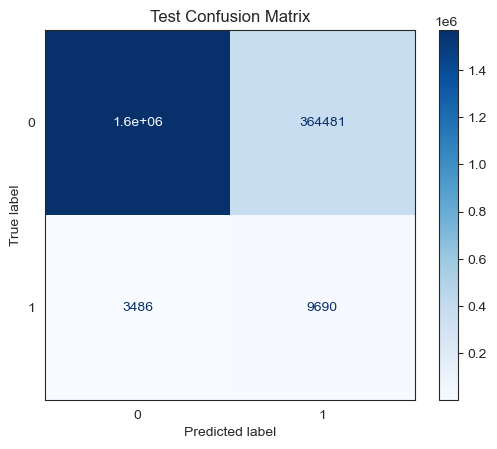

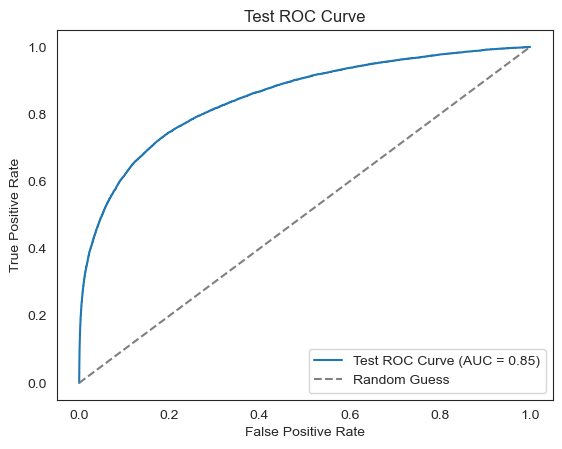

In [17]:
# -----------------------------------------------------------
# 4. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

test_predictions = lgbm_model.predict(X_test)
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, test_predictions)
test_auc = roc_auc_score(y_test, test_probabilities)

print("\nTest Performance:")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test AUC-ROC: {test_auc:.2f}")
print(classification_report(y_test, test_predictions))

# Confusion Matrix ÏãúÍ∞ÅÌôî
cm_test = confusion_matrix(y_test, test_predictions)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lgbm_model.classes_)
disp_test.plot(cmap="Blues")
plt.title("Test Confusion Matrix")
plt.show()

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC Curve")
plt.legend()
plt.show()

FPÎ•º Ìù¨ÏÉùÌïòÍ≥†, FNÏùò Í∞íÏùÑ ÏÜåÌè≠ Ï§ÑÏù¥Í≥†, TPÏùò Í∞íÏùÑ ÏÜåÌè≠ Ï¶ùÍ∞ÄÏãúÏº∞Ïùå.

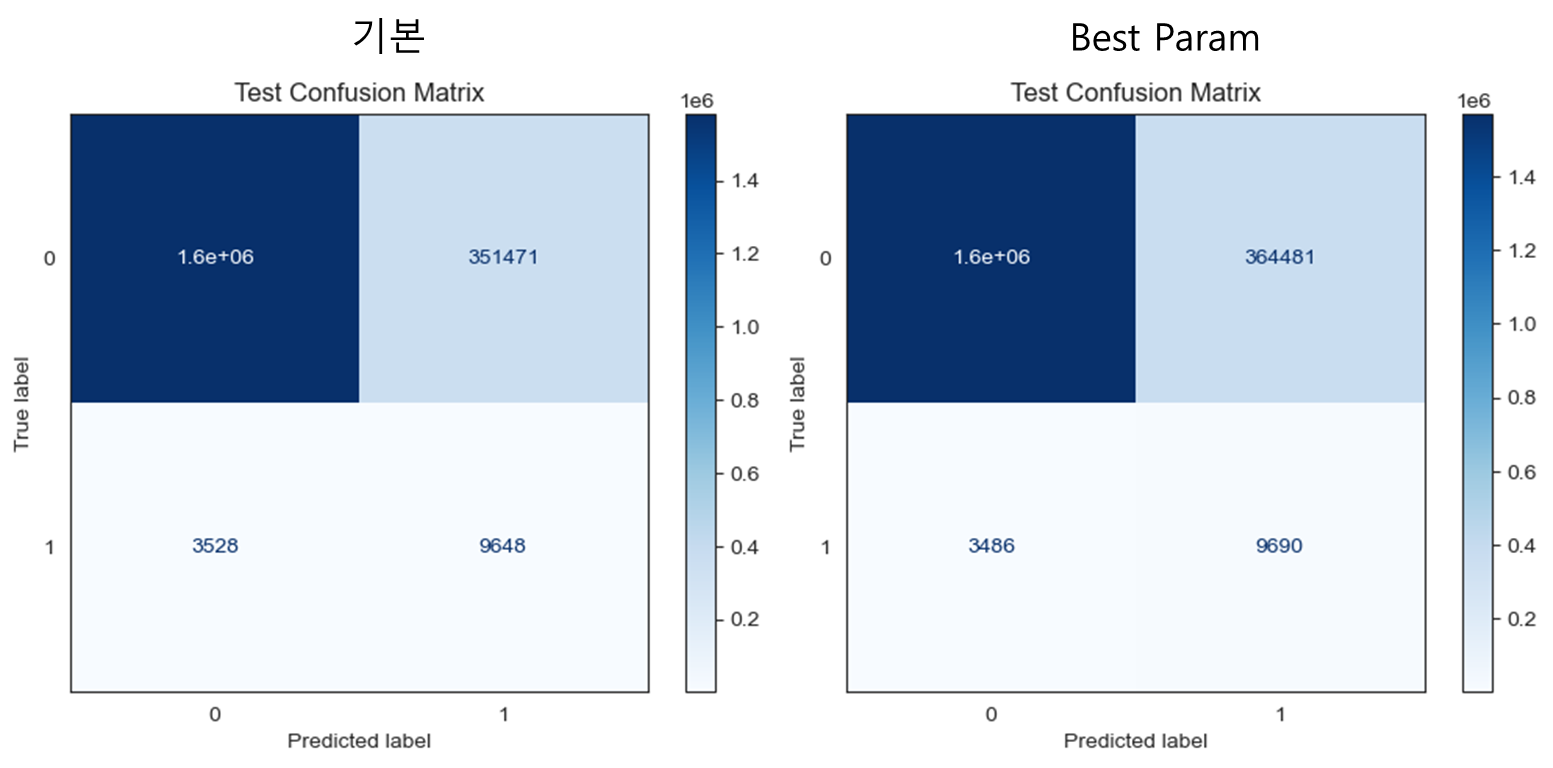

#### üìå Optuna Best Parameters (LightGBM)

OptunaÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ï∞æÏùÄ LightGBM Î™®Îç∏Ïùò ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞

##### üîπ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞í
| ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ | ÏµúÏ†Å Í∞í |
|--------------|-----------------------------|
| **n_estimators** | 994  |
| **learning_rate** | 0.1138  |
| **num_leaves** | 69  |
| **max_depth** | 2  |
| **min_child_samples** | 145  |
| **subsample** | 0.5077  |
| **colsample_bytree** | 0.7939  |
| **lambda_l1** | 4.6419  |
| **lambda_l2** | 9.1979  |